## H2O-3 AutoML Tutorial

[**1C. Introduction to Machine Learning with H2O-3 - AutoML**](https://training.h2o.ai/products/1c-introduction-to-machine-learning-with-h2o-3-automl)に沿ったチュートリアル

[**H2O 3 - ドキュメント**](http://docs.h2o.ai/h2o/latest-stable/h2o-docs/index.html)  
[**Python - APIドキュメント**](https://docs.h2o.ai/h2o/latest-stable/h2o-py/docs/index.html)

- [Initial Setup](#InitialSetup)
    - パッケージのインポート
    - H2Oクラスターの開始
    - データのロード
- [Start Experiment](#StartExperiment)
    - データの確認
    - 学習(train)/テスト(test)データセットへの分割
- [H2O AutoML Classification](#AutoMLClassification)
    - 利用変数の指定
    - AutoMLの定義と実行
    - 結果とモデル詳細の確認
- [H2O AutoML Regression](#AutoMLRegression)
    - 利用変数の指定

***

<a id='InitialSetup'></a>
### Initial Setup

In [1]:
import h2o
import matplotlib as plt
%matplotlib inline
from h2o.automl import H2OAutoML

In [2]:
#> H2Oクラスターの開始
h2o.init(url='http://localhost:54321')

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: java version "1.8.0_261"; Java(TM) SE Runtime Environment (build 1.8.0_261-b12); Java HotSpot(TM) 64-Bit Server VM (build 25.261-b12, mixed mode)
  Starting server from /home/ec2-user/anaconda3/envs/h2o_3/lib/python3.6/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmptlnwlnxj
  JVM stdout: /tmp/tmptlnwlnxj/h2o_ec2_user_started_from_python.out
  JVM stderr: /tmp/tmptlnwlnxj/h2o_ec2_user_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,02 secs
H2O_cluster_timezone:,Asia/Tokyo
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.30.1.2
H2O_cluster_version_age:,15 days
H2O_cluster_name:,H2O_from_python_ec2_user_b97fnd
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.399 Gb
H2O_cluster_total_cores:,4
H2O_cluster_allowed_cores:,4
H2O_cluster_status:,"accepting new members, healthy"


In [3]:
#> データのロード
loan_level = h2o.import_file("https://s3.amazonaws.com/data.h2o.ai/H2O-3-Tutorials/loan_level_50k.csv")

Parse progress: |█████████████████████████████████████████████████████████| 100%


***

<a id='StartExperiment'></a>
### Start Experiment

In [4]:
#> 各変数のサマリ
loan_level.describe()

Rows:49930
Cols:27




,CREDIT_SCORE,FIRST_PAYMENT_DATE,FIRST_TIME_HOMEBUYER_FLAG,MATURITY_DATE,METROPOLITAN_STATISTICAL_AREA,MORTGAGE_INSURANCE_PERCENTAGE,NUMBER_OF_UNITS,OCCUPANCY_STATUS,ORIGINAL_COMBINED_LOAN_TO_VALUE,ORIGINAL_DEBT_TO_INCOME_RATIO,ORIGINAL_UPB,ORIGINAL_LOAN_TO_VALUE,ORIGINAL_INTEREST_RATE,CHANNEL,PREPAYMENT_PENALTY_MORTGAGE_FLAG,PRODUCT_TYPE,PROPERTY_STATE,PROPERTY_TYPE,POSTAL_CODE,LOAN_SEQUENCE_NUMBER,LOAN_PURPOSE,ORIGINAL_LOAN_TERM,NUMBER_OF_BORROWERS,SELLER_NAME,SERVICER_NAME,PREPAID,DELINQUENT
type,int,int,enum,int,int,int,int,enum,int,int,int,int,real,enum,enum,enum,enum,enum,int,string,enum,int,int,enum,enum,enum,enum
mins,300.0,199902.0,,202404.0,10180.0,0.0,1.0,,6.0,1.0,10000.0,6.0,5.0,,,,,,600.0,NaN,,301.0,1.0,,,,
mean,712.3066000684786,200025.67422391332,,203023.39707590628,30705.25866529917,7.7196095038559225,1.0281994792709797,,76.08864765261981,32.83933763635989,136369.677548568,75.74523823829837,7.185977708792306,,,,,,55401.43412250129,NaN,,359.8508311636291,1.6294507784479138,,,,
maxs,830.0,200403.0,,203312.0,49740.0,50.0,4.0,,160.0,65.0,529000.0,100.0,10.625,,,,,,99900.0,NaN,,361.0,2.0,,,,
sigma,54.97355321804357,109.77460105152075,,110.47953133302413,11363.124822676407,12.042273590466614,0.21962330364819396,,15.06208012347409,11.165383364972822,60632.743281235904,14.867228331350553,0.5835949914330231,,,,,,29512.322859225387,NaN,,1.997469761340492,0.4829566953626224,,,,
zeros,0,0,,0,0,31023,0,,0,0,0,0,0,,,,,,0,0,,0,0,,,,
missing,279,0,13067,0,7029,5064,0,0,2,1437,0,1,0,0,504,0,0,13,4,0,0,0,23,0,0,0,0
0,707.0,200211.0,N,202903.0,33340.0,0.0,1.0,O,60.0,57.0,136000.0,60.0,6.25,R,N,FRM,WI,SF,53000.0,F199Q1000018,C,317.0,2.0,Other sellers,Other servicers,TRUE,FALSE
1,691.0,200302.0,N,202901.0,15940.0,0.0,1.0,O,65.0,25.0,130000.0,65.0,5.875,R,N,FRM,OH,SF,44700.0,F199Q1000023,P,312.0,2.0,Other sellers,Other servicers,TRUE,FALSE
2,730.0,199903.0,N,202902.0,16620.0,30.0,1.0,O,94.0,29.0,138000.0,94.0,7.0,T,N,FRM,WV,SF,25300.0,F199Q1000037,P,360.0,2.0,Other sellers,Other servicers,TRUE,FALSE


Classificationの実施では、"DELINQUENT"をターゲット変数として扱う

In [5]:
loan_level["DELINQUENT"].table()

DELINQUENT,Count
FALSE,48118
TRUE,1812


1812/49930=0.03629（3.63%）  
不均衡データ(class inbalance)になっている

Regressionの実施では、"ORIGINAL_INTEREST_RATE"をターゲット変数として扱う

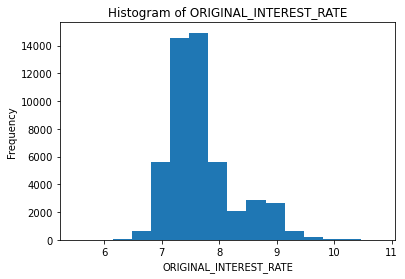

In [6]:
loan_level["ORIGINAL_INTEREST_RATE"].hist()

In [7]:
#> 学習/テストデータセットへの分割（学習 :  テスト = 80% : 20% ）
train, test = loan_level.split_frame([0.8], seed=42)
print("＜train/testのデータ数＞")
print("train:%d test:%d" % (train.nrows, test.nrows))

＜train/testのデータ数＞
train:39984 test:9946


これまでのチュートリアルと異なり、trainデータで交差検証(cross varidation)を実施しハイパーパラメータのチューニングを実施する

***

<a id='AutoMLClassification'></a>
### H2O AutoML Classification

[**AutoML: Automatic Machine Learning - ドキュメント**](http://docs.h2o.ai/h2o/latest-stable/h2o-docs/automl.html)  
[**H2OAutoML - APIドキュメント**](https://docs.h2o.ai/h2o/latest-stable/h2o-py/docs/modeling.html#h2oautoml)

H2O AutoMLの機能
- 基本的なデータ処理（欠損処理、標準化、エンコーディング）
- 変数選択(Feature Selection)と特徴量エンジニアリング(Feature Engineering)
- ハイパーパラメータのチューニング（グリッドサーチ、ランダムサーチ）
- モデル選択
    - モデルの種類に関しては[FAQ](https://docs.h2o.ai/h2o/latest-stable/h2o-py/docs/modeling.html#h2oautoml)参照
- スタッキング
    - すべてのモデルを用いたスタッキングと各モデルファミリーの中からベストなモデルでのスタッキングが実施される（[ドキュメント](http://docs.h2o.ai/h2o/latest-stable/h2o-docs/data-science/stacked-ensembles.html)、[APIドキュメント](https://docs.h2o.ai/h2o/latest-stable/h2o-py/docs/modeling.html#h2ostackedensembleestimator)）

In [8]:
#> 利用変数の定義
y = "DELINQUENT"
ignore = ["DELINQUENT", "PREPAID", "PREPAYMENT_PENALTY_MORTGAGE_FLAG", "PRODUCT_TYPE"] 
x = list(set(train.names) - set(ignore))
x

['ORIGINAL_INTEREST_RATE',
 'POSTAL_CODE',
 'CREDIT_SCORE',
 'ORIGINAL_DEBT_TO_INCOME_RATIO',
 'ORIGINAL_LOAN_TERM',
 'SERVICER_NAME',
 'NUMBER_OF_UNITS',
 'MORTGAGE_INSURANCE_PERCENTAGE',
 'ORIGINAL_COMBINED_LOAN_TO_VALUE',
 'OCCUPANCY_STATUS',
 'METROPOLITAN_STATISTICAL_AREA',
 'NUMBER_OF_BORROWERS',
 'PROPERTY_STATE',
 'FIRST_TIME_HOMEBUYER_FLAG',
 'PROPERTY_TYPE',
 'LOAN_PURPOSE',
 'CHANNEL',
 'ORIGINAL_LOAN_TO_VALUE',
 'ORIGINAL_UPB',
 'LOAN_SEQUENCE_NUMBER',
 'MATURITY_DATE',
 'SELLER_NAME',
 'FIRST_PAYMENT_DATE']

In [9]:
aml = H2OAutoML(max_models=25, 
                max_runtime_secs_per_model=30, 
                seed=42, 
                project_name='classification', 
                balance_classes=True, 
                class_sampling_factors=[0.5,1.25])

停止基準に関する設定 - [ドキュメント](http://docs.h2o.ai/h2o/latest-stable/h2o-docs/automl.html#required-stopping-parameters)
- [max_models](http://docs.h2o.ai/h2o/latest-stable/h2o-docs/data-science/algo-params/max_models.html)（作成する最大モデル数）か[max_runtime_secs](http://docs.h2o.ai/h2o/latest-stable/h2o-docs/data-science/algo-params/max_runtime_secs.html)（最大実行時間数）の設定に達すると、探索は終了する
- いずれも、最後に実施されるStacked Ensembleの処理に対しては非適用
- [max_runtime_secs_per_model](http://docs.h2o.ai/h2o/latest-stable/h2o-docs/data-science/algo-params/max_runtime_secs_per_model.html)は、各モデルの学習時間に制約を設ける
  
不均衡データ(class inbalance)に対する対処（Classificationのみ）
- balance_classes - [ドキュメント](http://docs.h2o.ai/h2o/latest-stable/h2o-docs/data-science/algo-params/balance_classes.html)、[APIドキュメント](https://docs.h2o.ai/h2o/latest-stable/h2o-py/docs/modeling.html#h2o.estimators.deeplearning.H2ODeepLearningEstimator.balance_classes)（Over Sampling/Under Samplingを実施する場合、"True"を指定）
- class_sampling_factors - [ドキュメント](http://docs.h2o.ai/h2o/latest-stable/h2o-docs/data-science/algo-params/class_sampling_factors.html)、[APIドキュメント](https://docs.h2o.ai/h2o/latest-stable/h2o-py/docs/modeling.html#h2o.estimators.deeplearning.H2ODeepLearningEstimator.class_sampling_factors)（Over Sampling/Under Samplingの比率。"DELINQUENT"はindex orderで、FALSE,TRUEと並んでおり、元の数に対し[0.5,1.25]倍する調整を実施(48118×0.5, 1812×1.25)）

In [10]:
%time aml.train(x=x, y=y, training_frame=train)

AutoML progress: |████████████████████████████████████████████████████████| 100%
CPU times: user 15.6 s, sys: 515 ms, total: 16.1 s
Wall time: 9min 1s


validation_frameを設定しない場合（これまでのチュートリアルでは`model.train(x=x, y=y, training_frame=train, validation_frame=valid)`と設定していた）、k分割交差検証法が実施される

In [11]:
#> k分割交差検証法の分割数(k)
aml.nfolds

5

[Leaderboard](http://docs.h2o.ai/h2o/latest-stable/h2o-docs/automl.html#leaderboard)の表示  
k分割交差検証法による結果が表示（validation_frameを指定した場合はホールドアウト法の結果）

In [12]:
lb = aml.leaderboard
lb.head(rows=lb.nrows)

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
StackedEnsemble_AllModels_AutoML_20200918_072924,0.854196,0.127253,0.228688,0.328487,0.177071,0.0313542
GLM_1_AutoML_20200918_072924,0.853804,0.120899,0.205971,0.336445,0.175755,0.0308898
StackedEnsemble_BestOfFamily_AutoML_20200918_072924,0.853489,0.127169,0.228774,0.32639,0.177034,0.0313409
GBM_grid__1_AutoML_20200918_072924_model_3,0.84761,0.12166,0.216049,0.321445,0.175271,0.03072
XGBoost_3_AutoML_20200918_072924,0.844995,0.122303,0.213597,0.334973,0.175688,0.0308663
GBM_1_AutoML_20200918_072924,0.841529,0.125747,0.185693,0.306544,0.17798,0.031677
XGBoost_grid__1_AutoML_20200918_072924_model_1,0.840382,0.124329,0.201126,0.350661,0.17673,0.0312336
GBM_3_AutoML_20200918_072924,0.839857,0.127721,0.199398,0.356579,0.17752,0.0315135
GBM_grid__1_AutoML_20200918_072924_model_2,0.837549,0.124473,0.202238,0.331704,0.176433,0.0311287
GBM_5_AutoML_20200918_072924,0.837053,0.12567,0.197568,0.35796,0.177011,0.0313329


個別のモデルを用い、[Stacked Ensembles](http://docs.h2o.ai/h2o/latest-stable/h2o-docs/data-science/stacked-ensembles.html)した結果がトップとなっている

各モデルの計算時間を表示する場合  
"training_time_ms"はミリ秒での学習時間

In [13]:
from h2o.automl import get_leaderboard
lb2 = get_leaderboard(aml, extra_columns='ALL')
lb2.head(rows=lb2.nrows)

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse,training_time_ms,predict_time_per_row_ms
StackedEnsemble_AllModels_AutoML_20200918_072924,0.854196,0.127253,0.228688,0.328487,0.177071,0.0313542,2417,0.044472
GLM_1_AutoML_20200918_072924,0.853804,0.120899,0.205971,0.336445,0.175755,0.0308898,6231,0.001294
StackedEnsemble_BestOfFamily_AutoML_20200918_072924,0.853489,0.127169,0.228774,0.32639,0.177034,0.0313409,1860,0.047322
GBM_grid__1_AutoML_20200918_072924_model_3,0.84761,0.12166,0.216049,0.321445,0.175271,0.03072,1751,0.014502
XGBoost_3_AutoML_20200918_072924,0.844995,0.122303,0.213597,0.334973,0.175688,0.0308663,1805,0.002326
GBM_1_AutoML_20200918_072924,0.841529,0.125747,0.185693,0.306544,0.17798,0.031677,1278,0.00846
XGBoost_grid__1_AutoML_20200918_072924_model_1,0.840382,0.124329,0.201126,0.350661,0.17673,0.0312336,2417,0.002768
GBM_3_AutoML_20200918_072924,0.839857,0.127721,0.199398,0.356579,0.17752,0.0315135,1493,0.010417
GBM_grid__1_AutoML_20200918_072924_model_2,0.837549,0.124473,0.202238,0.331704,0.176433,0.0311287,1491,0.010239
GBM_5_AutoML_20200918_072924,0.837053,0.12567,0.197568,0.35796,0.177011,0.0313329,1848,0.011432


ベストなモデルの詳細を確認してみる

In [32]:
#> ベストモデルのID
best_model_ids = lb[0,0]
best_model_ids

'StackedEnsemble_AllModels_AutoML_20200918_072924'

In [34]:
#> ベストモデルの取得と精度の詳細
se = h2o.get_model(best_model_ids)
se

Model Details
H2OStackedEnsembleEstimator :  Stacked Ensemble
Model Key:  StackedEnsemble_AllModels_AutoML_20200918_072924

No model summary for this model

ModelMetricsBinomialGLM: stackedensemble
** Reported on train data. **

MSE: 0.009936862165574404
RMSE: 0.09968381095029626
LogLoss: 0.048790147519537454
Null degrees of freedom: 10024
Residual degrees of freedom: 10015
Null deviance: 3082.404320268478
Residual deviance: 978.2424577667259
AIC: 998.2424577667259
AUC: 0.9977040257559374
AUCPR: 0.932521469482204
Gini: 0.9954080515118748

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.1967284184009056: 


,FALSE,TRUE,Error,Rate
FALSE,9594.0,74.0,0.0077,(74.0/9668.0)
TRUE,24.0,333.0,0.0672,(24.0/357.0)
Total,9618.0,407.0,0.0098,(98.0/10025.0)



Maximum Metrics: Maximum metrics at their respective thresholds


metric,threshold,value,idx
max f1,0.1967284,0.8717277,214.0
max f2,0.1520378,0.9220986,232.0
max f0point5,0.4106299,0.8784235,155.0
max accuracy,0.2503648,0.9905237,193.0
max precision,0.9975930,1.0,0.0
max recall,0.0777858,1.0,272.0
max specificity,0.9975930,1.0,0.0
max absolute_mcc,0.1967284,0.8686812,214.0
max min_per_class_accuracy,0.1222546,0.9844849,245.0
max mean_per_class_accuracy,0.0933783,0.9865452,260.0



Gains/Lift Table: Avg response rate:  3.56 %, avg score:  4.68 %


group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
1,0.0100748,0.8109941,27.2471365,27.2471365,0.9702970,0.9219858,0.9702970,0.9219858,0.2745098,0.2745098,2624.7136478,2624.7136478,0.2741995
2,0.0200499,0.6198878,26.6771709,26.9635715,0.95,0.7188192,0.9601990,0.8209079,0.2661064,0.5406162,2567.7170868,2596.3571498,0.5397888
3,0.0300249,0.3676720,22.1841737,25.3757317,0.79,0.4957345,0.9036545,0.7128768,0.2212885,0.7619048,2118.4173669,2437.5731688,0.7589052
4,0.04,0.2019229,16.0063025,23.0392157,0.57,0.2757066,0.8204489,0.6038568,0.1596639,0.9215686,1500.6302521,2203.9215686,0.9141214
5,0.0500748,0.1214779,6.3947361,19.6904260,0.2277228,0.1552073,0.7011952,0.5135907,0.0644258,0.9859944,539.4736112,1869.0425971,0.9704793
6,0.1000499,0.0442895,0.2802518,9.9950150,0.0099800,0.0657295,0.3559322,0.2898834,0.0140056,1.0,-71.9748179,899.5014955,0.9331816
7,0.1500249,0.0318713,0.0,6.6655585,0.0,0.0368842,0.2373670,0.2056064,0.0,1.0,-100.0,566.5558511,0.8813612
8,0.2,0.0265472,0.0,5.0000000,0.0,0.0289126,0.1780549,0.1614550,0.0,1.0,-100.0,400.0000000,0.8295408
9,0.3000499,0.0217982,0.0,3.3327793,0.0,0.0237815,0.1186835,0.1155485,0.0,1.0,-100.0,233.2779255,0.7257964
10,0.4,0.0193344,0.0,2.5000000,0.0,0.0204074,0.0890274,0.0917751,0.0,1.0,-100.0,150.0000000,0.6221556




ModelMetricsBinomialGLM: stackedensemble
** Reported on cross-validation data. **

MSE: 0.03135418709714252
RMSE: 0.17707113569733077
LogLoss: 0.12725340483550912
Null degrees of freedom: 39983
Residual degrees of freedom: 39975
Null deviance: 12249.762610914247
Residual deviance: 10176.200277885993
AIC: 10194.200277885993
AUC: 0.8541959415173503
AUCPR: 0.22868800837545541
Gini: 0.7083918830347007

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.08810033547664753: 


,FALSE,TRUE,Error,Rate
FALSE,36963.0,1604.0,0.0416,(1604.0/38567.0)
TRUE,872.0,545.0,0.6154,(872.0/1417.0)
Total,37835.0,2149.0,0.0619,(2476.0/39984.0)



Maximum Metrics: Maximum metrics at their respective thresholds


metric,threshold,value,idx
max f1,0.0881003,0.3056646,258.0
max f2,0.0376916,0.3901973,321.0
max f0point5,0.1548174,0.2944071,208.0
max accuracy,0.7376280,0.9649360,43.0
max precision,0.9950255,1.0,0.0
max recall,0.0152869,1.0,399.0
max specificity,0.9950255,1.0,0.0
max absolute_mcc,0.0667759,0.2843325,280.0
max min_per_class_accuracy,0.0269056,0.7741708,346.0
max mean_per_class_accuracy,0.0237501,0.7770792,356.0



Gains/Lift Table: Avg response rate:  3.54 %, avg score:  3.55 %


group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
1,0.0100040,0.3807415,11.0753140,11.0753140,0.3925,0.6209667,0.3925,0.6209667,0.1107975,0.1107975,1007.5314044,1007.5314044,0.1044967
2,0.0200080,0.2129176,7.1954270,9.1353705,0.255,0.2790422,0.32375,0.4500044,0.0719831,0.1827805,619.5426958,813.5370501,0.1687530
3,0.0300120,0.1512522,7.4070572,8.5592661,0.2625,0.1771076,0.3033333,0.3590388,0.0741002,0.2568807,640.7057163,755.9266055,0.2352042
4,0.0400160,0.1143587,6.2078193,7.9714044,0.22,0.1315214,0.2825,0.3021595,0.0621030,0.3189838,520.7819337,697.1404375,0.2892174
5,0.0500200,0.0940830,4.7969513,7.3365138,0.17,0.1033874,0.26,0.2624050,0.0479887,0.3669725,379.6951306,633.6513761,0.3285977
6,0.1000150,0.0501822,3.2466198,5.2920781,0.1150575,0.0665687,0.1875469,0.1645114,0.1623147,0.5292872,224.6619781,429.2078136,0.4450442
7,0.1500100,0.0365756,2.2020552,4.2622422,0.0780390,0.0424696,0.1510504,0.1238376,0.1100917,0.6393790,120.2055156,326.2242201,0.5073490
8,0.2000050,0.0301270,1.7926987,3.6449335,0.0635318,0.0330764,0.1291734,0.1011501,0.0896260,0.7290049,79.2698749,264.4933540,0.5484361
9,0.2999950,0.0237724,1.0304489,2.7735113,0.0365183,0.0264973,0.0982910,0.0762679,0.1030346,0.8320395,3.0448887,177.3511311,0.5515925
10,0.4000100,0.0207044,0.6068250,2.2317720,0.0215054,0.0220624,0.0790922,0.0627149,0.0606916,0.8927311,-39.3175040,123.1771989,0.5108243


In [48]:
type(se)    # H2OStackedEnsembleEstimatorクラスとなっている

h2o.estimators.stackedensemble.H2OStackedEnsembleEstimator

In [49]:
# パラメータの確認
se.actual_params

{'model_id': 'StackedEnsemble_AllModels_AutoML_20200918_072924',
 'training_frame': 'automl_training_py_9_sid_933c',
 'response_column': 'DELINQUENT',
 'validation_frame': None,
 'blending_frame': None,
 'base_models': [{'__meta': {'schema_version': 3,
    'schema_name': 'KeyV3',
    'schema_type': 'Key<Keyed>'},
   'name': 'GLM_1_AutoML_20200918_072924',
   'type': 'Key<Keyed>',
   'URL': None},
  {'__meta': {'schema_version': 3,
    'schema_name': 'KeyV3',
    'schema_type': 'Key<Keyed>'},
   'name': 'GBM_grid__1_AutoML_20200918_072924_model_3',
   'type': 'Key<Keyed>',
   'URL': None},
  {'__meta': {'schema_version': 3,
    'schema_name': 'KeyV3',
    'schema_type': 'Key<Keyed>'},
   'name': 'XGBoost_3_AutoML_20200918_072924',
   'type': 'Key<Keyed>',
   'URL': None},
  {'__meta': {'schema_version': 3,
    'schema_name': 'KeyV3',
    'schema_type': 'Key<Keyed>'},
   'name': 'GBM_1_AutoML_20200918_072924',
   'type': 'Key<Keyed>',
   'URL': None},
  {'__meta': {'schema_version': 3,
 

スタッキングに利用したアルゴリズム(Metalearner)の確認（
[ドキュメント](http://docs.h2o.ai/h2o/latest-stable/h2o-docs/data-science/algo-params/metalearner_algorithm.html)、[APIドキュメント](http://docs.h2o.ai/h2o/latest-stable/h2o-docs/data-science/algo-params/metalearner_algorithm.html)）

In [52]:
#> Metalearnerの確認
se.actual_params['metalearner_algorithm']

'glm'

In [54]:
#> Metalearnerの取得
metalearner = h2o.get_model(se.metalearner()['name'])

MetalearnerがGLMなので、その係数を表示しスタッキングに使われた各モデルの貢献度を確認してみる

In [55]:
#> 係数の表示
metalearner.coef()

{'Intercept': -4.157813326610924,
 'GLM_1_AutoML_20200918_072924': 1.6809779152104825,
 'GBM_grid__1_AutoML_20200918_072924_model_3': 0.0,
 'XGBoost_3_AutoML_20200918_072924': 1.1497201415098315,
 'GBM_1_AutoML_20200918_072924': 0.0,
 'XGBoost_grid__1_AutoML_20200918_072924_model_1': 0.18661608798325457,
 'GBM_3_AutoML_20200918_072924': 0.0,
 'GBM_grid__1_AutoML_20200918_072924_model_2': 0.0,
 'GBM_5_AutoML_20200918_072924': 0.0,
 'GBM_2_AutoML_20200918_072924': 0.0,
 'GBM_grid__1_AutoML_20200918_072924_model_1': 0.0,
 'XGBoost_grid__1_AutoML_20200918_072924_model_4': 0.5879288325859352,
 'XGBoost_grid__1_AutoML_20200918_072924_model_3': 0.34774813281618333,
 'GBM_4_AutoML_20200918_072924': 0.0,
 'DeepLearning_1_AutoML_20200918_072924': 2.4661220589840473,
 'DeepLearning_grid__1_AutoML_20200918_072924_model_1': 0.0,
 'XGBoost_1_AutoML_20200918_072924': 0.0,
 'XGBoost_2_AutoML_20200918_072924': 0.2038579147594998,
 'XGBoost_grid__1_AutoML_20200918_072924_model_5': 0.0,
 'XGBoost_grid__1

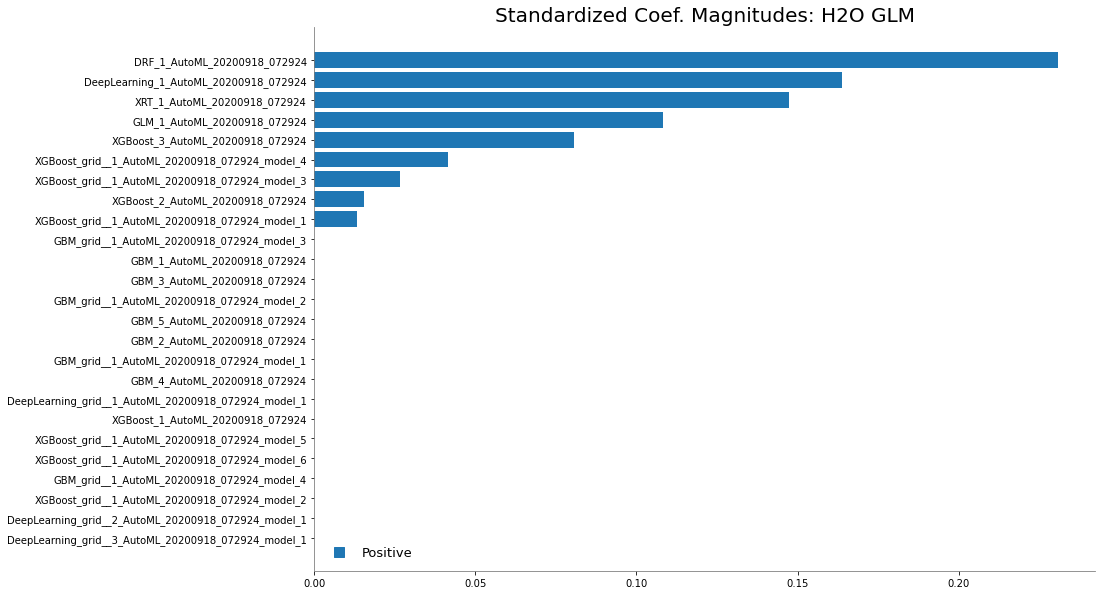

In [56]:
#> 値の大きい順にプロット
metalearner.std_coef_plot()

ベストモデル(Stacked Ensemble)をtestデータで評価してみる

In [57]:
#> 各精度指標
aml.leader.model_performance(test_data=test)


ModelMetricsBinomialGLM: stackedensemble
** Reported on test data. **

MSE: 0.03540800625655777
RMSE: 0.18817015240616075
LogLoss: 0.14406584836406727
Null degrees of freedom: 9945
Residual degrees of freedom: 9936
Null deviance: 3327.7962854655334
Residual deviance: 2865.757855658026
AIC: 2885.757855658026
AUC: 0.8220646257466578
AUCPR: 0.21062421181452293
Gini: 0.6441292514933157

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.12588873176616458: 


,FALSE,TRUE,Error,Rate
FALSE,9303.0,248.0,0.026,(248.0/9551.0)
TRUE,282.0,113.0,0.7139,(282.0/395.0)
Total,9585.0,361.0,0.0533,(530.0/9946.0)



Maximum Metrics: Maximum metrics at their respective thresholds


metric,threshold,value,idx
max f1,0.1258887,0.2989418,197.0
max f2,0.0319011,0.3788783,323.0
max f0point5,0.1675748,0.3197470,165.0
max accuracy,0.9764316,0.9602855,1.0
max precision,0.9764316,0.5,1.0
max recall,0.0156486,1.0,398.0
max specificity,0.9892955,0.9998953,0.0
max absolute_mcc,0.1341012,0.2720840,189.0
max min_per_class_accuracy,0.0251806,0.7569620,343.0
max mean_per_class_accuracy,0.0249627,0.7597782,344.0



Gains/Lift Table: Avg response rate:  3.97 %, avg score:  3.52 %


group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
1,0.0100543,0.4208375,11.5826835,11.5826835,0.46,0.6379010,0.46,0.6379010,0.1164557,0.1164557,1058.2683544,1058.2683544,0.1108018
2,0.0200080,0.2097857,7.1215446,9.3633229,0.2828283,0.2913913,0.3718593,0.4655168,0.0708861,0.1873418,612.1544560,836.3322944,0.1742541
3,0.0300623,0.1480673,6.0431392,8.2528936,0.24,0.1760650,0.3277592,0.3687102,0.0607595,0.2481013,504.3139241,725.2893612,0.2270563
4,0.0400161,0.1114526,4.5781358,7.3388207,0.1818182,0.1297888,0.2914573,0.3092800,0.0455696,0.2936709,357.8135788,633.8820686,0.2641452
5,0.0500704,0.0890546,3.2733671,6.5224645,0.13,0.0978268,0.2590361,0.2668195,0.0329114,0.3265823,227.3367089,552.2464542,0.2879476
6,0.1000402,0.0467125,2.5838372,4.5551301,0.1026157,0.0627285,0.1809045,0.1648765,0.1291139,0.4556962,158.3837200,355.5130081,0.3703648
7,0.1500101,0.0354436,2.4825103,3.8647199,0.0985915,0.0404347,0.1534853,0.1234237,0.1240506,0.5797468,148.2510251,286.4719856,0.4475094
8,0.2000804,0.0295194,1.8707844,3.3657350,0.0742972,0.0321816,0.1336683,0.1005903,0.0936709,0.6734177,87.0784403,236.5735004,0.4929131
9,0.3000201,0.0232737,1.0639330,2.5989819,0.0422535,0.0259506,0.1032172,0.0757271,0.1063291,0.7797468,6.3932965,159.8981912,0.4995667
10,0.4000603,0.0203356,0.6326570,2.1072771,0.0251256,0.0216186,0.0836894,0.0621966,0.0632911,0.8430380,-36.7343044,110.7277129,0.4612978


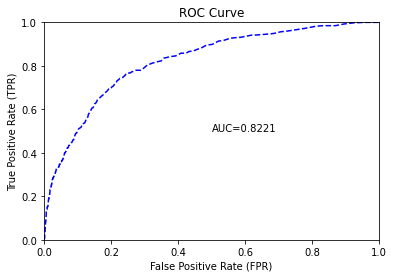

In [59]:
#> ROC曲線
aml.leader.model_performance(test_data=test).plot()

In [60]:
#> 予測値を出力する場合
aml.predict(test)

stackedensemble prediction progress: |████████████████████████████████████| 100%


predict,FALSE,TRUE
FALSE,0.97693,0.0230702
FALSE,0.980059,0.0199408
FALSE,0.983975,0.0160253
FALSE,0.964716,0.0352844
FALSE,0.979407,0.0205929
FALSE,0.983719,0.0162809
FALSE,0.983887,0.016113
FALSE,0.984396,0.015604
FALSE,0.98217,0.0178302
FALSE,0.983489,0.0165113


***

<a id='AutoMLRegression'></a>
### H2O AutoML Regression

[**AutoML: Automatic Machine Learning - ドキュメント**](http://docs.h2o.ai/h2o/latest-stable/h2o-docs/automl.html)  
[**H2OAutoML - APIドキュメント**](https://docs.h2o.ai/h2o/latest-stable/h2o-py/docs/modeling.html#h2oautoml)

機能概要に関しては上記[H2O AutoML Classification](#AutoMLClassification)参照

In [8]:
#> 利用変数の定義
y_reg = "ORIGINAL_INTEREST_RATE"

ignore_reg = ["ORIGINAL_INTEREST_RATE", "FIRST_PAYMENT_DATE", "MATURITY_DATE", "MORTGAGE_INSURANCE_PERCENTAGE", 
              "PREPAYMENT_PENALTY_MORTGAGE_FLAG", "LOAN_SEQUENCE_NUMBER", "PREPAID", "DELINQUENT", "PRODUCT_TYPE"] 
x_reg = list(set(train.names) - set(ignore_reg))

print("y:", y_reg, "\nx:", x_reg)

y: ORIGINAL_INTEREST_RATE 
x: ['OCCUPANCY_STATUS', 'ORIGINAL_COMBINED_LOAN_TO_VALUE', 'ORIGINAL_LOAN_TERM', 'PROPERTY_TYPE', 'ORIGINAL_DEBT_TO_INCOME_RATIO', 'SELLER_NAME', 'CHANNEL', 'FIRST_TIME_HOMEBUYER_FLAG', 'LOAN_PURPOSE', 'POSTAL_CODE', 'SERVICER_NAME', 'NUMBER_OF_BORROWERS', 'METROPOLITAN_STATISTICAL_AREA', 'ORIGINAL_LOAN_TO_VALUE', 'PROPERTY_STATE', 'CREDIT_SCORE', 'NUMBER_OF_UNITS', 'ORIGINAL_UPB']


In [9]:
aml = H2OAutoML(max_runtime_secs=900, 
                max_runtime_secs_per_model=30, 
                seed=42, 
                project_name='regression', 
                stopping_metric="RMSE", 
                sort_metric="RMSE")

%time aml.train(x=x_reg, y=y_reg, training_frame=train)

AutoML progress: |████████████████████████████████████████████████████████| 100%
CPU times: user 32.6 s, sys: 1.04 s, total: 33.7 s
Wall time: 14min 17s


停止基準に関する設定 - [ドキュメント](http://docs.h2o.ai/h2o/latest-stable/h2o-docs/automl.html#required-stopping-parameters)
- [max_models](http://docs.h2o.ai/h2o/latest-stable/h2o-docs/data-science/algo-params/max_models.html)（作成する最大モデル数）か[max_runtime_secs](http://docs.h2o.ai/h2o/latest-stable/h2o-docs/data-science/algo-params/max_runtime_secs.html)（最大実行時間数）の設定に達すると、探索は終了する
- いずれも、最後に実施されるStacked Ensembleの処理に対しては非適用
- [max_runtime_secs_per_model](http://docs.h2o.ai/h2o/latest-stable/h2o-docs/data-science/algo-params/max_runtime_secs_per_model.html)は、各モデルの学習時間に制約を設ける

In [10]:
#> Leaderboardの表示
lb = aml.leaderboard
lb.head(rows=lb.nrows)

model_id,rmse,mean_residual_deviance,mse,mae,rmsle
GBM_3_AutoML_20200919_100814,0.430926,0.185697,0.185697,0.312762,0.0509682
GBM_2_AutoML_20200919_100814,0.431104,0.185851,0.185851,0.313055,0.0509991
GBM_4_AutoML_20200919_100814,0.431829,0.186476,0.186476,0.313391,0.051081
GBM_5_AutoML_20200919_100814,0.432314,0.186895,0.186895,0.314104,0.0511675
GBM_1_AutoML_20200919_100814,0.432326,0.186906,0.186906,0.314525,0.051135
GBM_grid__1_AutoML_20200919_100814_model_3,0.435424,0.189594,0.189594,0.314663,0.0515001
XGBoost_grid__1_AutoML_20200919_100814_model_11,0.435461,0.189626,0.189626,0.318522,0.0515487
GBM_grid__1_AutoML_20200919_100814_model_2,0.436157,0.190233,0.190233,0.319127,0.0515591
XGBoost_grid__1_AutoML_20200919_100814_model_3,0.436336,0.190389,0.190389,0.317971,0.0516364
XGBoost_3_AutoML_20200919_100814,0.436513,0.190544,0.190544,0.318767,0.0516495


ベストなモデルの詳細を確認してみる

In [11]:
#> ベストモデルのID
best_model_id = lb[0,0]
best_model_id

'GBM_3_AutoML_20200919_100814'

In [12]:
#> ベストモデルの取得と精度の詳細
gbm = h2o.get_model(best_model_id)
gbm

Model Details
H2OGradientBoostingEstimator :  Gradient Boosting Machine
Model Key:  GBM_3_AutoML_20200919_100814


Model Summary: 


,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
,63.0,63.0,144772.0,8.0,8.0,8.0,74.0,194.0,143.63492




ModelMetricsRegression: gbm
** Reported on train data. **

MSE: 0.14100955531107212
RMSE: 0.3755123903562599
MAE: 0.27105837744348
RMSLE: 0.04450961989593695
Mean Residual Deviance: 0.14100955531107212

ModelMetricsRegression: gbm
** Reported on cross-validation data. **

MSE: 0.1856971159824454
RMSE: 0.4309258822378222
MAE: 0.3127621487794693
RMSLE: 0.05096816143100227
Mean Residual Deviance: 0.1856971159824454

Cross-Validation Metrics Summary: 


,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
mae,0.3127621,0.0015153,0.3134710,0.3150485,0.3114543,0.3115176,0.3123194
mean_residual_deviance,0.1856971,0.0031937,0.1881150,0.1900244,0.1841923,0.1834162,0.1827374
mse,0.1856971,0.0031937,0.1881150,0.1900244,0.1841923,0.1834162,0.1827374
r2,0.4556501,0.0080986,0.4502302,0.4470083,0.4541986,0.4676411,0.4591723
residual_deviance,0.1856971,0.0031937,0.1881150,0.1900244,0.1841923,0.1834162,0.1827374
rmse,0.4309131,0.0036992,0.4337222,0.4359178,0.4291763,0.4282711,0.4274780
rmsle,0.0509670,0.0003821,0.0511804,0.0515414,0.0507288,0.0507118,0.0506726



Scoring History: 


,timestamp,duration,number_of_trees,training_rmse,training_mae,training_deviance
,2020-09-19 10:10:24,12.497 sec,0.0,0.5840731,0.4417488,0.3411413
,2020-09-19 10:10:24,12.665 sec,5.0,0.5100365,0.3846547,0.2601372
,2020-09-19 10:10:24,12.823 sec,10.0,0.4702076,0.3533793,0.2210952
,2020-09-19 10:10:25,12.985 sec,15.0,0.4390652,0.3268828,0.1927782
,2020-09-19 10:10:25,13.149 sec,20.0,0.4227118,0.3123354,0.1786853
,2020-09-19 10:10:25,13.307 sec,25.0,0.4110861,0.3019183,0.1689918
,2020-09-19 10:10:25,13.465 sec,30.0,0.4019009,0.2933671,0.1615243
,2020-09-19 10:10:25,13.622 sec,35.0,0.3957187,0.2879096,0.1565933
,2020-09-19 10:10:25,13.779 sec,40.0,0.3904656,0.2834524,0.1524634
,2020-09-19 10:10:26,13.931 sec,45.0,0.3859720,0.2796297,0.1489743



Variable Importances: 


variable,relative_importance,scaled_importance,percentage
SELLER_NAME,16441.7285156,1.0,0.4336732
SERVICER_NAME,4987.6699219,0.3033544,0.1315567
PROPERTY_STATE,4863.1918945,0.2957835,0.1282734
LOAN_PURPOSE,2087.2360840,0.1269475,0.0550537
ORIGINAL_UPB,2051.5412598,0.1247765,0.0541122
OCCUPANCY_STATUS,1717.5278320,0.1044615,0.0453022
CREDIT_SCORE,1373.9852295,0.0835670,0.0362408
ORIGINAL_LOAN_TO_VALUE,1236.7592773,0.0752208,0.0326212
ORIGINAL_DEBT_TO_INCOME_RATIO,740.9278564,0.0450639,0.0195430
ORIGINAL_COMBINED_LOAN_TO_VALUE,555.5686646,0.0337902,0.0146539


In [13]:
type(gbm)

h2o.estimators.gbm.H2OGradientBoostingEstimator

In [14]:
# 主要パラメータの確認
print("ntrees = ", gbm.params['ntrees'])
print("max depth = ", gbm.params['max_depth'])
print("learn rate = ", gbm.params['learn_rate'])
print("sample rate = ", gbm.params['sample_rate'])

ntrees =  {'default': 50, 'actual': 63, 'input': 10000}
max depth =  {'default': 5, 'actual': 8, 'input': 8}
learn rate =  {'default': 0.1, 'actual': 0.1, 'input': 0.1}
sample rate =  {'default': 1.0, 'actual': 0.8, 'input': 0.8}


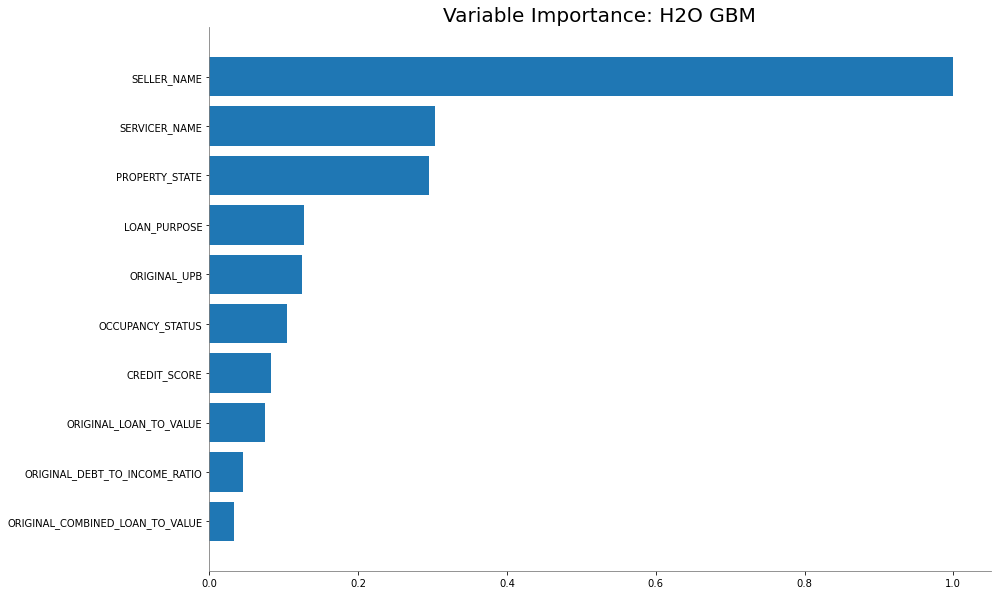

In [15]:
#> 変数重要度プロット
gbm.varimp_plot()

In [16]:
#> testデータで評価した場合の各精度指標
gbm.model_performance(test_data=test)


ModelMetricsRegression: gbm
** Reported on test data. **

MSE: 0.1839827816146282
RMSE: 0.4289321410370505
MAE: 0.3131541097163355
RMSLE: 0.050781012306998684
Mean Residual Deviance: 0.1839827816146282


In [17]:
#> Leaderboardから直接取得する場合
aml.leader.model_performance(test_data=test)


ModelMetricsRegression: gbm
** Reported on test data. **

MSE: 0.1839827816146282
RMSE: 0.4289321410370505
MAE: 0.3131541097163355
RMSLE: 0.050781012306998684
Mean Residual Deviance: 0.1839827816146282


`gbm.model_performance(test_data=test)`と`aml.leader.model_performance(test_data=test)`は一致

In [18]:
#> 予測値の出力と、実績値との比較
pred = gbm.predict(test)
pred = pred.cbind(test['ORIGINAL_INTEREST_RATE'])
pred.head()

gbm prediction progress: |████████████████████████████████████████████████| 100%


predict,ORIGINAL_INTEREST_RATE
6.91158,7.5
7.00282,6.625
7.2348,7
7.232,7.15
7.15418,7
7.35065,7.125
6.89471,8.75
6.87871,6.5
7.05361,7
7.20205,7.25


***

In [19]:
#> H2Oクラスターの終了
h2o.cluster().shutdown()

H2O session _sid_96e9 closed.
